In [68]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import statistics
import pycountry
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import re
pd.options.mode.chained_assignment = None


In [107]:
#data
movies_df = pd.read_csv('/Users/devikasunil/Downloads/pythonPortfolioproject/movies.csv')
movies_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [108]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [110]:
#rating,released,score,votes,writer,star,country,gross,company,runtime have null values
#how many missing values
for col in movies_df.columns:
    rows_missing = np.sum(movies_df[col].isnull())
    print( col,"-",rows_missing)


name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [115]:
#Since 2171 missing values are there in column budget 
#it might be difficult to find each movies budget
#lets remove all the missing values of the dataframe
movies_df.dropna(inplace= True)

In [116]:
#Data types of movies_df
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [117]:
#column values of budget how many times it is repeated
movies_df['budget'].value_counts().sort_values(ascending=False)

20000000.0     232
30000000.0     229
25000000.0     211
10000000.0     206
15000000.0     204
              ... 
129000000.0      1
18600000.0       1
40600000.0       1
750000.0         1
84500000.0       1
Name: budget, Length: 398, dtype: int64

In [118]:
#replace the nan values of gross and gross by the values
#should we choose the mean or median or mode
budget_mean = np.mean(movies_df['budget'])
budget_median = np.median(movies_df['budget'])
budget_mode = statistics.mode(movies_df['budget'])
print('budget mean:',budget_mean)
print('budget median:',budget_median)
print('budget mode:',budget_mode)

budget mean: 36009170.47020845
budget median: 21800000.0
budget mode: 20000000.0


In [119]:
gross_mean = np.mean(movies_df['gross'])
gross_median = np.median(movies_df['gross'])
gross_mode = statistics.mode(movies_df['gross'])
print('gross mean:',gross_mean)
print('gross median:',gross_median)
print('gross mode:',gross_mode)

gross mean: 103229653.33333333
gross median: 36869414.0
gross mode: 14000000.0


In [121]:
#change the data type of columns
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')

In [122]:
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [123]:
movies_df['correct_year'] = movies_df['released'].astype(str)
movies_df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime                   correct_year  
0   46998772        Warner Bros.    146.0  June 13, 1980 (United States)  
1   58853106   Columbia Pictures    104.0   July 2, 1980 (United States)  
2  538375067           Lucasfilm    124.0  June 20, 1980 (United States)  
3   83453539  Paramount Pictures     88.0   July 2, 1980 (United States)  
4   39846344      Orion Pictures     98.0  July 25, 1980 (United States)

In [82]:
#to remove countries from the column released 
#-This didnt work for every row so used the other function

def remove_countries(row):
    result=''
    low_row = row.lower()

    for p in pycountry.countries:
        if p.name.lower() in low_row:
            result = low_row.replace(p.name.lower(), '')
    return result[-7:-3]

In [124]:
#regex function to remove the countries name and 
#if there is nan values then it is displayed as it is
def remove_country(row1):
    #regex = [A-Z,a-z]+\s?[a-z,A-Z]+\)
    l_row = row1.lower()
    #print(l_row)
    if l_row =='nan':
        return l_row
    else :
        res = re.sub(r"[A-Z,a-z]+\s?[a-z,A-Z]+?\s?[a-z]+?\s?[a-z]+?\)",'', l_row)
        return res[-6:-2]
print(remove_country("August 19, 2020 (United States)"))

2020


In [125]:
# created a copy
df = movies_df.copy(deep= True)


In [126]:
#correct year column is added using lambda function
df['correct_year']= movies_df.apply(lambda x : remove_country(x['correct_year']), axis = 1)

In [132]:
#to check if there is wrong values
df['correct_year'].value_counts().sort_values(ascending=True)

2020     11
1980     36
1981     54
1982     71
1983     86
1984     88
1985     96
1986     98
1987    104
1990    108
1991    116
1988    120
2019    121
1989    121
1992    124
1993    134
1994    134
1995    139
1996    143
2018    144
2017    146
1997    147
1998    148
2012    158
2016    158
2001    159
2004    159
1999    159
2005    159
2014    161
2013    161
2006    162
2010    162
2015    163
2007    165
2000    166
2009    166
2008    167
2003    168
2002    169
2011    170
Name: correct_year, dtype: int64

<Axes: >

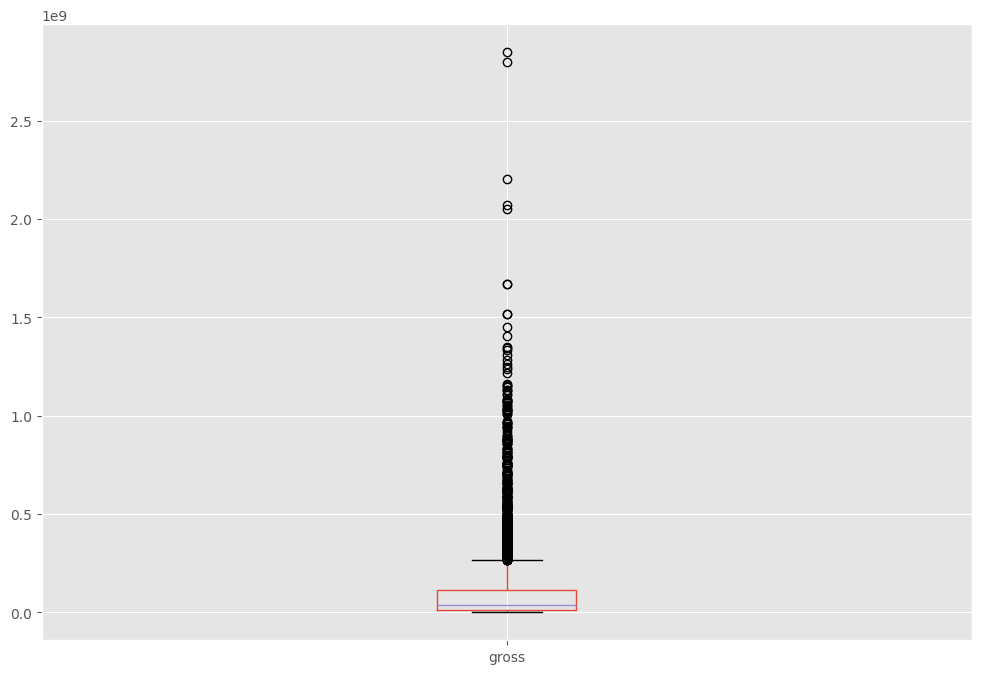

In [128]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [134]:
#in jupyter notebook it is supposed to display all the output of the cell in scrollable manner 
#but it doesnt work in VScode
pd.set_option('display.max_rows', None)

In [135]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

## Time to see if there is any correlation between different columns with the gross amount 

I believe that the budget column and company column might have high correlation with gross column

Scatter plot between budget and gross column


Text(0, 0.5, 'Gross')

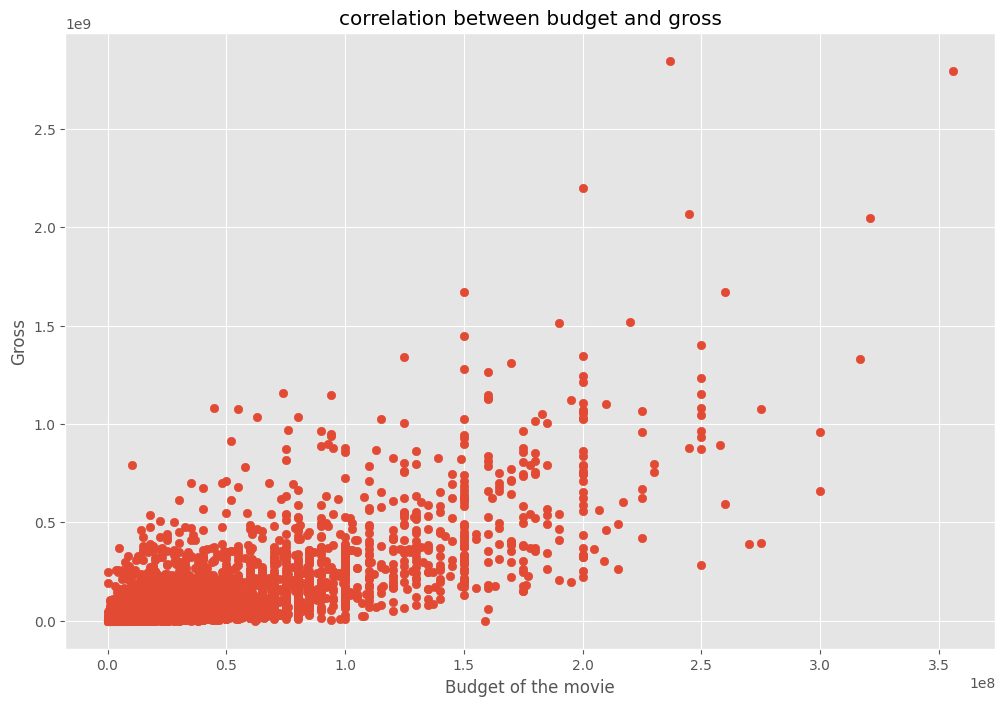

In [140]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('correlation between budget and gross')
plt.xlabel('Budget of the movie')
plt.ylabel('Gross')

In [141]:
df.corr()

/var/folders/b3/pjc9lb1j2ws7v0fcx8z9tgc80000gn/T/ipykernel_13399/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

Text(0, 0.5, 'Gross')

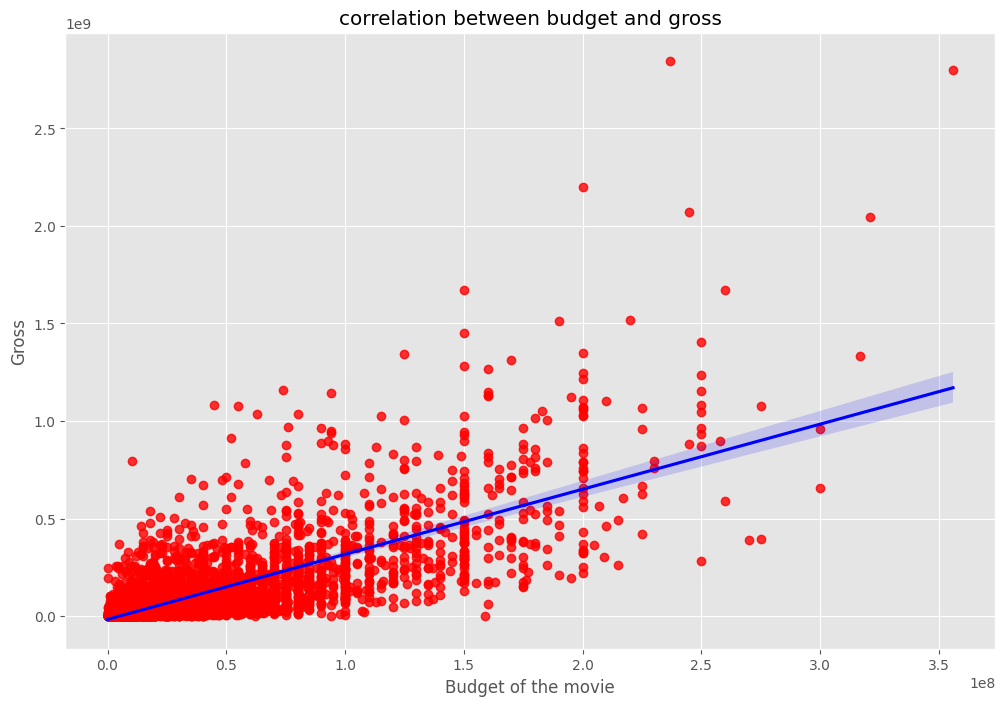

In [144]:
sns.regplot(x=df['budget'], y=df['gross'],data=df,scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('correlation between budget and gross')
plt.xlabel('Budget of the movie')
plt.ylabel('Gross')

In [145]:
df.corr(method='pearson')

/var/folders/b3/pjc9lb1j2ws7v0fcx8z9tgc80000gn/T/ipykernel_13399/1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

High Correlation between the budget and gross columns :.74

/var/folders/b3/pjc9lb1j2ws7v0fcx8z9tgc80000gn/T/ipykernel_13399/1166321837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


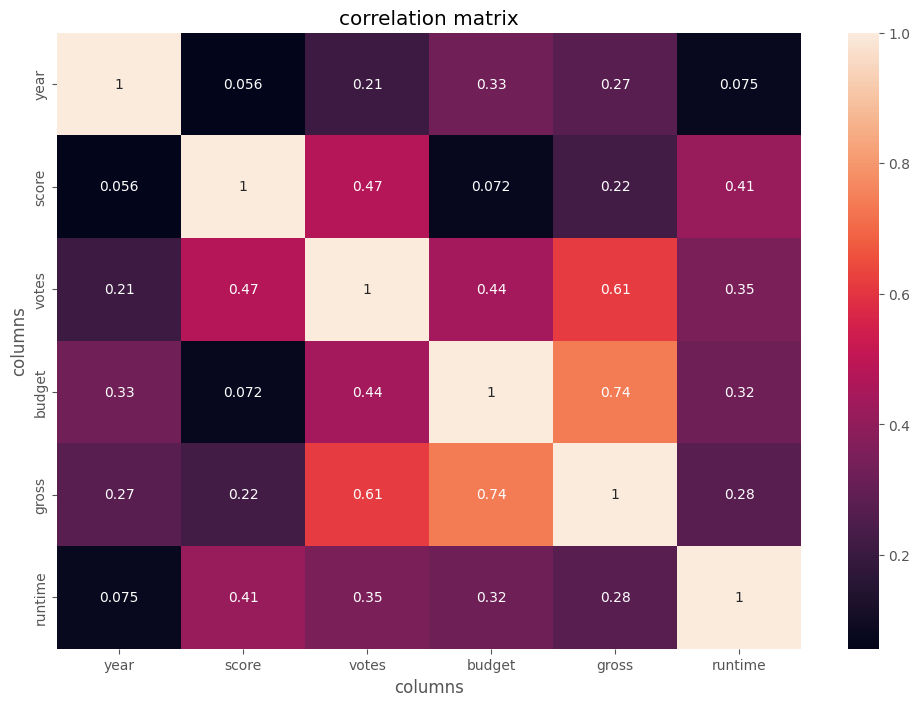

In [150]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('correlation matrix')
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

Now looking at the company column. It is a string so it have to be converted to categorical data


In [147]:
df_categorical = df.copy(deep= True)
df_categorical.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime correct_year  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [148]:
for col_name in df_categorical.columns:
    if df_categorical[col_name].dtype == 'object':
        df_categorical[col_name] = df_categorical[col_name].astype('category')
        df_categorical[col_name] = df_categorical[col_name].cat.codes
df_categorical

name  rating  genre  year  released  score      votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1     3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3      204       4      4  1980      1127    7.7   221000.0       889    1413   
4      732       6      4  1980      1170    7.3   108000.0       719     351   
5     1509       6      9  1980      1922    6.4   123000.0      1758    3081   
6     3930       6      0  1980      1359    7.9   188000.0       974     576   
7     3122       6      3  1980       530    8.2   330000.0      1269    1257   
8     3732       4      0  1980      1346    6.8   101000.0      1606    1402   
9     4401       6      3  1980      1755    7.0    10000.0      2011     280   
10     332       4      0  1980       510    6.1    18000.0       236    2810   
11    4179       4      1  1980      2272    7.3    54000.0       817    1300   
12    3029       4      1  1980       471    5.3    30000.0      1643    1658   
13    2859       6      6  1980      2416    7.7    49000.0      1666    1653   
14    1208       6      5  1980      1170    7.1    37000.0       207     350   
15    3553       4      6  1980      2294    7.2    27000.0       847    2507   
17      66       4      4  1980       530    6.9    29000.0       333    2315   
18    4143       6      9  1980       832    6.8    66000.0       943    1486   
20     986       6      5  1980       714    6.5    20000.0      2032    3151   
21    1762       6      1  1980       117    6.8    14000.0      1307    2065   
22    4128       4      0  1980       213    6.7    22000.0       502    2959   
23    5289       4      8  1980       437    5.3    12000.0      1654    2492   
28     700       6      5  1980      1359    7.2    17000.0      1870    3099   
29     261       6      5  1980       667    6.2    22000.0      1489    2358   
33     785       4      6  1980       117    6.1      604.0      1146     673   
35    3068       6      4  1980      2156    6.2    24000.0       744    2207   
36    4245       6      4  1980      1883    6.3     4300.0       581     966   
37    2618       6      4  1980      2257    6.0    11000.0      1116    2578   
42    4736       6      0  1980      1413    7.1     9000.0      1613    1802   
46    4312       6      0  1980      1304    5.3     3900.0      1337    2383   
48    4512       4      0  1980      1922    5.1     3100.0       329    2036   
50    3648       4      4  1980      2476    7.3    22000.0      2043    3184   
51    2497       6      4  1980      2416    6.8     4500.0      1025     303   
53     692       4      0  1980      1289    6.1    11000.0       327     768   
56    5193       4      0  1980      1629    4.6     2600.0       793    1078   
57    2818       4      4  1980      1051    5.4     2400.0       914    2623   
58    4519       6      0  1980       261    5.1     5200.0       551    1819   
75    4351       1      1  1980      1399    5.8     1300.0       267     939   
77    5240       6      4  1980       261    5.9      415.0      1484    1339   
80    2971       6      6  1980      2551    4.0      546.0       969    1014   
92    1973       4      0  1981      1296    8.4   905000.0      1859    1806   
94     284       6      4  1981       314    7.5    97000.0       974    1524   
95    1301       6      0  1981      1040    7.2   131000.0       943    1486   
96    4100       2      9  1981        46    7.5   192000.0      1735    2707   
97    3031       6      4  1981      1568    6.2    40000.0       177     307   
98     603       6      5  1981      1162    7.4    47000.0       207     350   
99     861       4      0  1981      1296    6.9    42000.0       478     277   
100   1329       6      1  1981        11    7.4    59000.0       937    2963   
101   2389       6      0  1981      

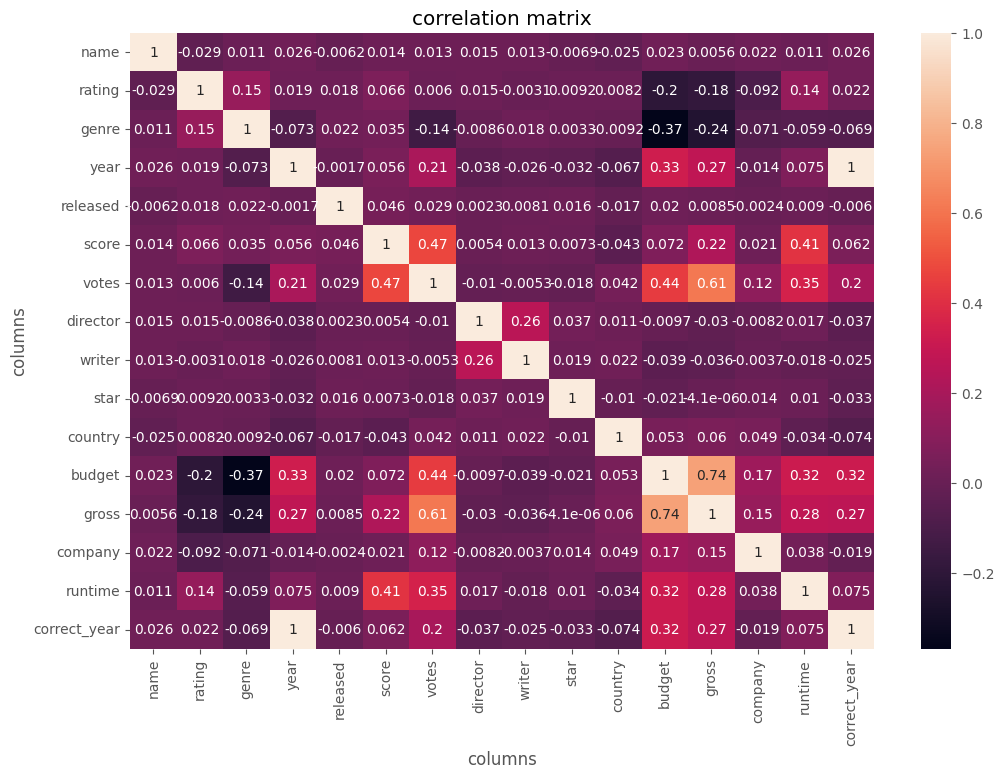

In [151]:
correlation_matrix = df_categorical.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('correlation matrix')
plt.xlabel('columns')
plt.ylabel('columns')
plt.show()

In [152]:
corr_matrix = df_categorical.corr(method='pearson')
corr_pairs = corr_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              correct_year    0.025542
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [154]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.368523
budget        genre          -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
company       rating         -0.092357
rating        company        -0.092357
country       correct_year   -0.073569
correct_year  country        -0.073569
year          genre          -0.073167
genre         year           -0.073167
              company        -0.071334
company       genre          -0.071334
genre         correct_year   -0.069147
correct_year  genre          -0.069147
year          country        -0.066748
country       year           -0.066748
genre         runtime        -0.059237
runtime       genre          -0.059237
score         country        -0.043051
country       score      

In [155]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
year          correct_year    0.998726
correct_year  year            0.998726
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

### So comparing different correlation values I noticed that gross have high correlation with votes and budget. Gross donot have high correlation with the company